# Carbonate membership functions for wave

In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [2]:
def plot_fuzzy_curve(bathy,law,label,color='r'):
    fig, ax0 = plt.subplots(figsize=(8, 4))
    ax0.plot(bathy, law, color, linewidth=4, label=label)
    lg = ax0.legend(loc=4)
    lg.draw_frame(False)
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('Wave height [m]')
    plt.ylabel('Fuzzy value')
    plt.show()
    return

In [3]:
datafolder='../data/'

In [4]:
wave_height = np.linspace(0.0, 10.0, num=1000, endpoint=True)

# Low wave energy MBF

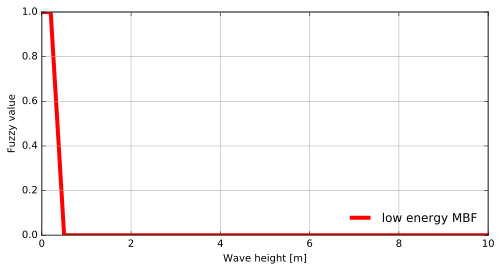

In [5]:
# Parameters
a = 0
b = 0
c = 0.2
d = 0.5
wave0 = fuzz.trapmf(wave_height, [a, b, c, d])

# Visualise fuzzy production curve
plot_fuzzy_curve(wave_height,wave0,'low energy MBF')

In [6]:
# Write membership function
nameCSV = 'mbf_low_wave'
df = pd.DataFrame({'X':wave_height,'Y':wave0})
df.to_csv(str(datafolder)+str(nameCSV)+'.csv',columns=['X', 'Y'], sep=' ', index=False ,header=0)

# Medium wave energy MBF

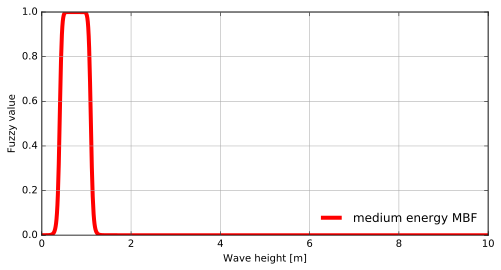

In [7]:
# Parameters
a = 0.35
b = 7
c = 0.75
wave1 = fuzz.gbellmf(wave_height, a, b, c)

# Visualise fuzzy production curve
plot_fuzzy_curve(wave_height,wave1,'medium energy MBF')

In [8]:
# Write membership function
nameCSV = 'mbf_med_wave'
df = pd.DataFrame({'X':wave_height,'Y':wave1})
df.to_csv(str(datafolder)+str(nameCSV)+'.csv',columns=['X', 'Y'], sep=' ', index=False ,header=0)

# High wave energy MBF

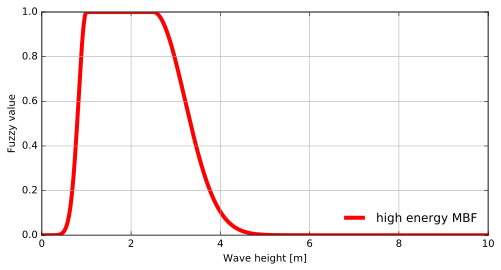

In [9]:
# Parameters
wave_sigma = 1
wave2 = fuzz.gaussmf(wave_height, 2.5, wave_sigma)
wave_sigma2 = 0.25
wave3 = fuzz.gaussmf(wave_height, 1., wave_sigma2)

id1 = np.where(wave_height<1.)[0]
id2 = np.where(wave_height>2.5)[0]

wave2[id1[-1]:id2[0]] = 1.
wave2[:id1[-1]] = wave3[:id1[-1]]

# Visualise fuzzy production curve
plot_fuzzy_curve(wave_height,wave2,'high energy MBF')

In [10]:
# Write membership function
nameCSV = 'mbf_high_wave'
df = pd.DataFrame({'X':wave_height,'Y':wave2})
df.to_csv(str(datafolder)+str(nameCSV)+'.csv',columns=['X', 'Y'], sep=' ', index=False ,header=0)

# Extreme wave energy MBF

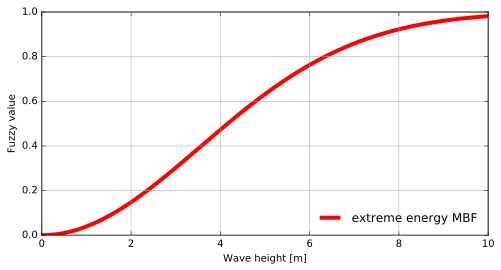

In [11]:
# Parameters
wave_sigma = 5
wave3 = 1.-fuzz.gaussmf(wave_height, 0, wave_sigma)

# Visualise fuzzy production curve
plot_fuzzy_curve(wave_height,wave3,'extreme energy MBF')

In [12]:
# Write membership function
nameCSV = 'mbf_extreme_wave'
df = pd.DataFrame({'X':wave_height,'Y':wave3})
df.to_csv(str(datafolder)+str(nameCSV)+'.csv',columns=['X', 'Y'], sep=' ', index=False ,header=0)